In [196]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Data Preprocessing

In [197]:
microplastics = pd.read_csv('/Users/ethanfreshman/Desktop/Marine_Microplastics_WGS84_5159774935198085819.csv')
microplastics

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,...,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,1,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,45.28000,-60.29000,7/13/1989 12:00:00 AM,88ccb360-a4b6-4dac-954e-4eb7d61ecab4,-60.29000,45.28000
1,2,Atlantic Ocean,NaN,NaN,Neuston net,0.002276,pieces/m3,0.0005-0.005,Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.93000,-70.65000,10/12/1989 12:00:00 AM,5a9c64f2-a6fb-40ed-a79a-f4bbb586d753,-70.65000,40.93000
2,3,Atlantic Ocean,NaN,NaN,Neuston net,0.004320,pieces/m3,0.0005-0.005,Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.93000,-70.65000,10/12/1989 12:00:00 AM,a09a6842-c66a-4718-9989-4907cd428f38,-70.65000,40.93000
3,4,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.30000,-69.77000,10/12/1989 12:00:00 AM,ce10e70e-5af9-4bb9-80ac-3467c3e90fba,-69.77000,40.30000
4,5,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,39.88000,-67.15000,10/15/1989 12:00:00 AM,c2ccdc44-5c00-4e4d-bdcb-ae435dcefefd,-67.15000,39.88000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22261,22334,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,43.333333,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.48294,-8.94286,2/27/2019 12:00:00 AM,8186aa9e-f061-4e60-bc93-35cecea71b50,-8.94286,38.48294
22262,22335,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,43.333333,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.46124,-8.99428,2/27/2019 12:00:00 AM,0e2c5b28-b51b-4763-acec-c708af61683f,-8.99428,38.46124
22263,22336,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,76.666667,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.44652,-9.04146,2/27/2019 12:00:00 AM,c4d70e52-ba68-42e3-93cf-160d0e516095,-9.04146,38.44652
22264,22337,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,23.333333,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.43987,-9.09325,2/27/2019 12:00:00 AM,5b5534c5-f6e5-43b2-b6fd-f1da28dc771e,-9.09325,38.43987


In [198]:
microplastics.columns

Index(['OBJECTID', 'Oceans', 'Regions', 'SubRegions', 'Sampling Method',
       'Measurement', 'Unit', 'Density Range', 'Density Class',
       'Short Reference', 'Long Reference', 'DOI', 'Organization', 'Keywords',
       'Accession Number', 'Accession Link', 'Latitude', 'Longitude', 'Date',
       'GlobalID', 'x', 'y'],
      dtype='object')

In [199]:
# Drop rows with missing values in critical columns like Latitude, Longitude, and Measurement
data_cleaned = microplastics.dropna(subset=['Latitude', 'Longitude', 'Measurement'])

# Select relevant features for anomaly detection
features = data_cleaned[['Measurement']].copy()

# Scale the features to bring them to a similar range
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [200]:
microplastics['Measurement'].describe()

count     16449.000000
mean        392.823279
std        8295.005977
min           0.000000
25%           0.000000
50%           0.010800
75%           0.202381
max      800000.000000
Name: Measurement, dtype: float64

# Dataset Visualization

<Axes: xlabel='Longitude', ylabel='Latitude'>

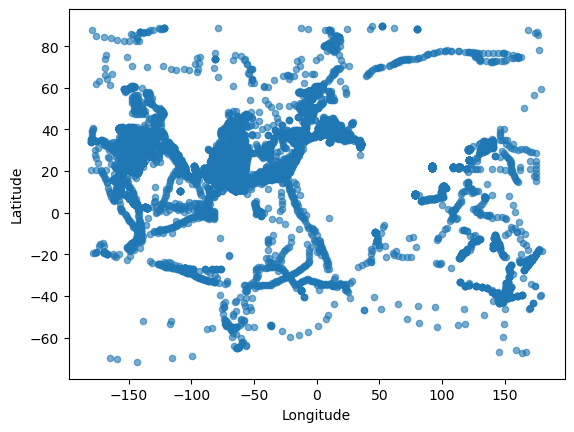

In [201]:
data_cleaned.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.6)

<Axes: xlabel='Longitude', ylabel='Latitude'>

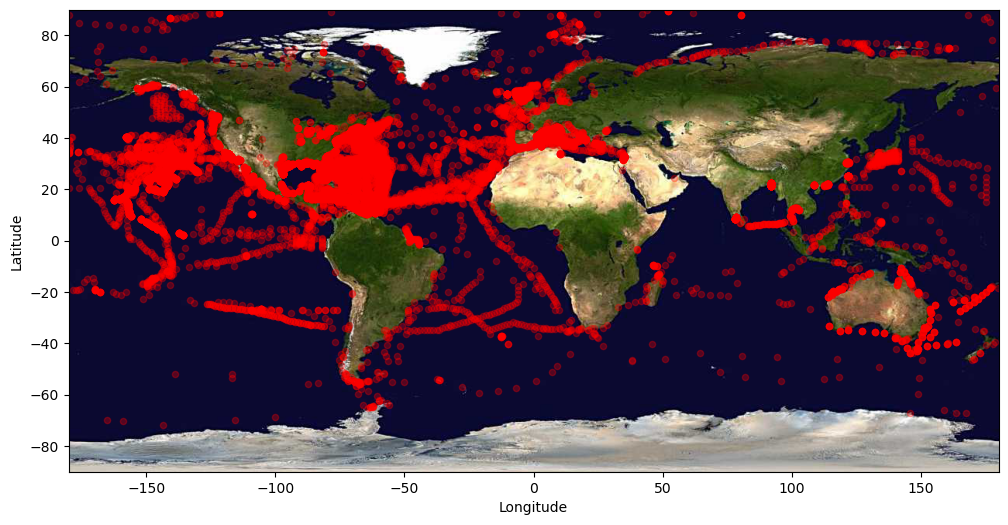

In [202]:
# Plot distribution of microplastics
world_image = mpimg.imread('/Users/ethanfreshman/Desktop/map.jpg')
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(world_image, extent=[-180, 180, -90, 90], aspect='auto')

microplastics.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.3, color='red', ax=ax)

# Anomaly Detection using Isolation Forest

In [203]:
# Step 4: Apply Anomaly Detection with Isolation Forest
# Fit the Isolation Forest model to detect anomalies
iso_forest = IsolationForest(contamination=0.05, random_state=42)
labels = iso_forest.fit_predict(scaled_features)

# Step 5: Add anomaly labels to the dataset
data_cleaned['anomaly'] = labels


/var/folders/jc/lnxp8vkd5858vcd9vjh2hqn80000gn/T/ipykernel_40511/1532151829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['anomaly'] = labels


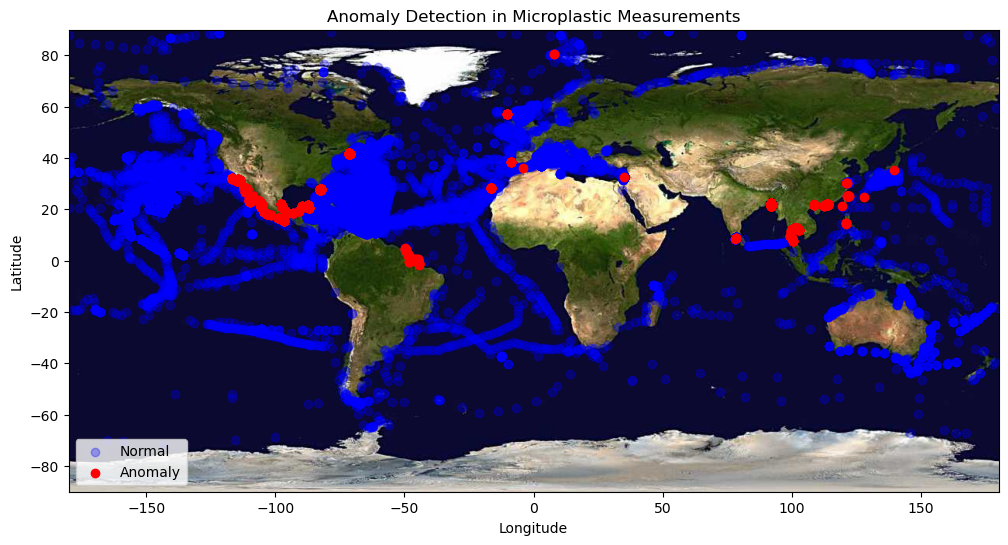

In [204]:
# Plot anomalies and normal data with world map background
world_image = mpimg.imread('/Users/ethanfreshman/Desktop/map.jpg')
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(world_image, extent=[-180, 180, -90, 90], aspect='auto')
ax.scatter(normal_data['Longitude'], normal_data['Latitude'],
           color='blue', label='Normal', alpha=0.3)
ax.scatter(anomalies['Longitude'], anomalies['Latitude'],
           color='red', label='Anomaly')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Anomaly Detection in Microplastic Measurements')
ax.legend(loc='lower left')
ax.grid(False)
plt.show()

# Fine-Tuning Hyperparameters

# Anomaly Clustering by Region

In [205]:
# Filter out the anomalies
anomalies = data_cleaned[data_cleaned['anomaly'] == -1]

# Use DBSCAN to cluster the anomalies
anomaly_features = anomalies[['Longitude', 'Latitude', 'Measurement']]
scaled_anomaly_features = scaler.fit_transform(anomaly_features)

# Apply DBSCAN to cluster anomalies
dbscan = DBSCAN(eps=0.5, min_samples=3)
anomaly_clusters = dbscan.fit_predict(scaled_anomaly_features)
anomalies['cluster'] = anomaly_clusters

# Sort anomalies by Measurement value to find the most anomalous
anomalies_sorted = anomalies.sort_values(by='Measurement', ascending=False)

/var/folders/jc/lnxp8vkd5858vcd9vjh2hqn80000gn/T/ipykernel_40511/1121672055.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['cluster'] = anomaly_clusters


In [206]:
anomalies_sorted['cluster'].value_counts()

cluster
 7    315
 1    244
 8     74
 2     63
 3     55
 5     46
-1      9
 0      7
 4      6
 6      3
Name: count, dtype: int64

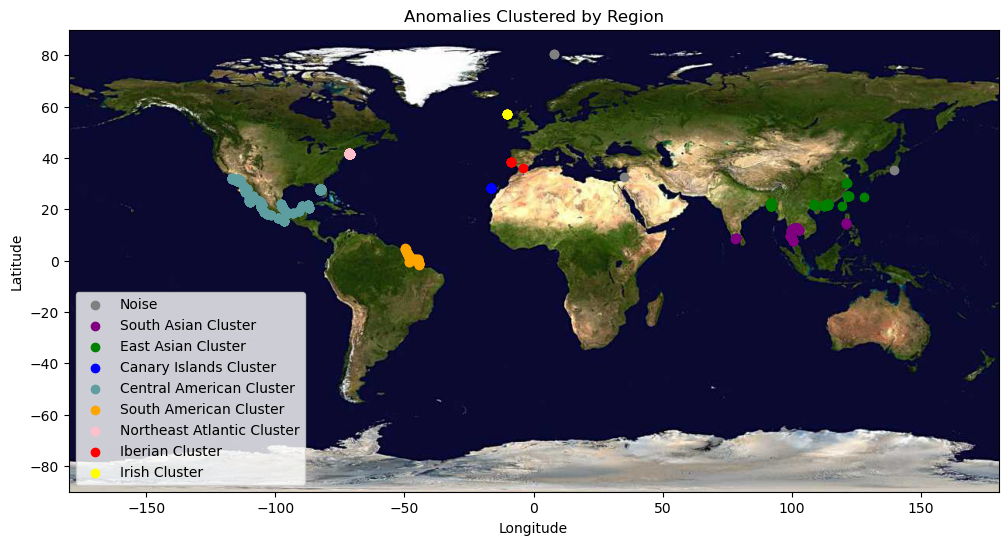

In [209]:
# Set world map background for plot
world_image = mpimg.imread('/Users/ethanfreshman/Desktop/map.jpg')
fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(world_image, extent=[-180, 180, -90, 90], aspect='auto')

# Custom labels for the clusters
custom_labels = {
    -1: 'Noise',  
    0: 'Iberian Cluster',
    1: 'East Asian Cluster',
    2: 'South Asian Cluster',
    3: 'South American Cluster',
    4: 'Irish Cluster',
    5: 'Canary Islands Cluster',
    6: '',
    7: 'Central American Cluster',
    8: 'Northeast Atlantic Cluster'
    # Add more labels as needed
}

# Plot anomalies with cluster labels
colors = ['red', 'green', 'purple', 'orange', 'yellow', 'blue', 'green', 'cadetblue', 'pink']
for cluster_id in anomalies_sorted['cluster'].unique():
    cluster_data = anomalies_sorted[anomalies_sorted['cluster'] == cluster_id]
    ax.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
               color=colors[cluster_id % len(colors)] if cluster_id != -1 else 'grey',
               label=custom_labels.get(cluster_id, f'Anomaly Cluster {cluster_id}'))

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(False)
ax.legend(loc='lower left')
ax.set_title('Anomalies Clustered by Region')
plt.show()

In [208]:
# Plot normal data
ax.scatter(normal_data['Longitude'], normal_data['Latitude'],
           color='blue', label='Normal', alpha=0.6)